In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import os, sys, glob

In [3]:
data_dir = (os.path.join(os.path.expanduser('~'), 
                         'Desktop/loki_1/data/physio/new_physio_811_ses3_run1/'))

In [4]:
assert os.path.exists(data_dir), 'check data path'

In [5]:
sample_ecg_file = os.path.join(data_dir, 'func-bold_task-lokicat_run-01_PhysioLog_recording-ECG_physio.tsv')
sample_ecg_json = os.path.join(data_dir, 'func-bold_task-lokicat_run-01_PhysioLog_recording-ECG_physio.json')

In [6]:
ecg_df = pd.read_csv(sample_ecg_file, sep='\t', header=None) # specify columns according to json
ecg_json = pd.read_json(sample_ecg_json)

In [7]:
ecg_json.head() 

,SamplingFrequency,StartTime,Columns
0,400,-6.8225,ECG4
1,400,-6.8225,ECG2
2,400,-6.8225,ECG1
3,400,-6.8225,ECG3
4,400,-6.8225,PULS_TRIGGER


In [8]:
ecg_df.head()

,0,1,2,3,4,5,6
0,1912.0,1953.0,2080.0,2002.0,0,0,0
1,1931.0,1968.0,2084.0,2006.0,0,0,0
2,1951.0,1983.0,2088.0,2011.0,0,0,0
3,1970.0,2000.0,2093.0,2015.0,0,0,0
4,1989.0,2018.0,2098.0,2018.0,0,0,0


In [9]:
ecg_json.Columns 

# ECGn = the signal for each of the four electrodes
# PULS_TRIGGER = the trigger for beginning the pulse data collection 
# ECG_TRIGGER = the trigger for the beginning of ECG data collection 
# scanner = the triggers for brain volume acquisition 

0            ECG4
1            ECG2
2            ECG1
3            ECG3
4    PULS_TRIGGER
5     ECG_TRIGGER
6         scanner
Name: Columns, dtype: object

In [10]:
ecg_df.columns = ecg_json.Columns

In [11]:
ecg_df.head()

Columns,ECG4,ECG2,ECG1,ECG3,PULS_TRIGGER,ECG_TRIGGER,scanner
0,1912.0,1953.0,2080.0,2002.0,0,0,0
1,1931.0,1968.0,2084.0,2006.0,0,0,0
2,1951.0,1983.0,2088.0,2011.0,0,0,0
3,1970.0,2000.0,2093.0,2015.0,0,0,0
4,1989.0,2018.0,2098.0,2018.0,0,0,0


Text(0, 0.5, 'voltage (mV?)')

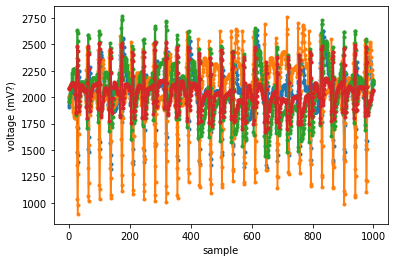

In [12]:
plt.plot(ecg_df.ECG4[:1000], '.-')
plt.plot(ecg_df.ECG3[:1000], '.-')
plt.plot(ecg_df.ECG2[:1000], '.-')
plt.plot(ecg_df.ECG1[:1000], '.-')

plt.xlabel('sample')
plt.ylabel('voltage (mV?)')

Text(0, 0.5, 'voltage (mV?)')

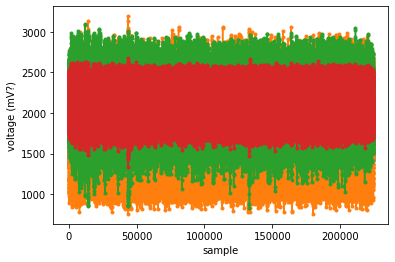

In [19]:
plt.plot(ecg_df.ECG4, '.-')
plt.plot(ecg_df.ECG3 , '.-')
plt.plot(ecg_df.ECG2 , '.-')
plt.plot(ecg_df.ECG1 , '.-')

plt.xlabel('sample')
plt.ylabel('voltage (mV?)')

Text(0, 0.5, 'count')

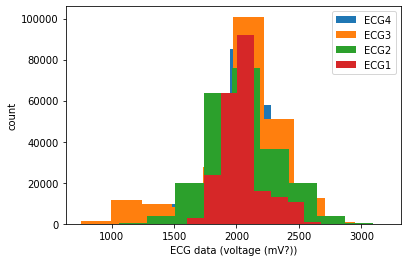

In [18]:
plt.figure()
plt.hist(ecg_df.ECG4, label='ECG4')
plt.hist(ecg_df.ECG3, label='ECG3')
plt.hist(ecg_df.ECG2, label='ECG2')
plt.hist(ecg_df.ECG1, label='ECG1')
plt.legend()

plt.xlabel('ECG data (voltage (mV?))')
plt.ylabel('count')